###ACP FROM SCRACH###
#NYA NJIKE ARMEL#



In [31]:
import numpy as np

#nom_fichier = str(input("Entrez le nom du fichier"))
#nbLignes = int(input("entrez le nombre d'individus :"))
#nbColone = int(input("entrez le nombre de variables :"))
# ************* MANUELLE *********************************

nom_fichier = "TP_ANALYSE"
nbLignes = 8
nbColone = 8
#    return nom_fichier,nbLignes,nbColone

In [32]:
import os
import math
import  random
def creer_fichier_de_données(nom_fichier,nbLignes,nbColone):
    os.chdir("../../../DATASCIENCEprojects/DATASCIENCE M1/ANALYSE DE DONNEES/")
    file = open(str(nom_fichier),"w")
    for i in range(nbLignes-1):
        for j in range(nbColone-1):
            file.write(str(random.randrange(2)))
            file.write(",")
        file.write(str(random.randrange(2)))
        file.write("\n")
    for k in range(nbColone-1):
        file.write(str(random.randrange(2)))
        file.write(",")
    file.write(str(random.randrange(2)))

    print("fichier ", nom_fichier," créer  !!")
creer_fichier_de_données(nom_fichier,nbLignes,nbColone)




fichier  TP_ANALYSE  créer  !!


In [49]:
def lire_donnees(fichier):
    file = open(fichier,"r")
    content = file.read()
    tab_de_lignes = content.split("\n")
    nbLine = len(tab_de_lignes)
    nbCol = len(tab_de_lignes[0].split(","))
    # ****************    Temoin de verification    ****************************
    #print("nombre de ligne ::",nbLine,"\n nombre de colones :: " ,nbCol,"\n",tab_de_lignes)
    return nbLine , nbCol , content
print(lire_donnees(nom_fichier)[2])

1,0,0,1,0,1,0,0
0,0,1,0,1,0,0,0
1,0,1,1,0,1,1,0
0,1,0,0,0,1,0,0
0,0,1,1,0,0,0,0
0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,1
0,0,1,0,1,1,1,1



##Creer la matrice de données##


In [50]:
def init_data_matrix(fichier):
    meta_data = lire_donnees(fichier)
    # ***** Temoin de verification de caracteristiques du fichier lu *****
    # print("nb lignes ::",meta_data[0],"\n nbColones ::",meta_data[1]," \ncontenue ::",meta_data[2])
    lignes = meta_data[2].split("\n")
    data_frame = [[lignes[i].split(",")[j] for i in range(len(lignes))] for j in range(meta_data[1])]
    data_frame = [[int(data_frame[j][i]) for j in range(meta_data[1])] for i in range(len(lignes))]
    print("le jeux de données ::")
    return data_frame
data_f = init_data_matrix(nom_fichier)
init_data_matrix(nom_fichier)

le jeux de données ::
le jeux de données ::


[[1, 0, 0, 1, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 0, 0],
 [1, 0, 1, 1, 0, 1, 1, 0],
 [0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 1, 1, 1, 1]]

recuperer un individu

In [51]:
def get_individu(n,data):
    return [data[n-1][i] for i in range(len(data[0]))]
indiv_i = get_individu(2,data_f)
get_individu(2,data_f)

[0, 0, 1, 0, 1, 0, 0, 0]

recuperer une variable

In [52]:

def get_var(n,data):
    # affichage des variables
    #print("variable 2 ::",[data[i][n-1] for i in range(len(data))])
    return [data[i][n-1] for i in range(len(data))]
var_i = get_var(1,data_f)
get_var(1,data_f)

[1, 0, 1, 0, 0, 0, 1, 0]

In [53]:
# *******  Calcul des variables en X^2
def get_pow_var(n,data):
    return [(data[i][n-1])**2 for i in range(len(data))]
var_o_carre = get_pow_var(1,data_f)
get_pow_var(1,data_f)

[1, 0, 1, 0, 0, 0, 1, 0]

**preparation des données**

#text-center #centrage des données#

In [54]:
"""  *************  calcul de l'individu moyen  ********* """
def ind_moyen(data_frame):
    """ idm = [data_frame[j][i]/len(data_frame) for i in range(len(data_f[0])) for j in range(len(data_f)) ]"""
    colSom = [sum(get_var(i+1,data_frame)) for i in range(len(data_frame[0]))]
    idm = [colSom[i]/len(data_frame)  for i in range(len(data_frame[0]))]
    return idm
id_Moyen = ind_moyen(data_f)
ind_moyen(data_f)

[0.375, 0.125, 0.5, 0.5, 0.5, 0.5, 0.25, 0.25]

*calcul de l'ecart type*

In [55]:
def ecart_type(data_frame):
    ecT = [math.sqrt(((1/len(data_frame)) * (sum(get_pow_var(i+1,data_frame)))) - (ind_moyen(data_frame)[i])**2) for i in range(len(data_frame[0]))]
    #print("moyenne var 1 ::",(ind_moyen(data_frame)[0]),"\n somme puissances var 1 ::",sum(get_pow_var(0,data_frame)),"\n les valeurs initiaux individu 1::",get_var(1,data_frame),"\n nb individus ::",len(data_frame))
    return ecT
tab_ecT_var = ecart_type(data_f)
ecart_type(data_f)

[0.4841229182759271,
 0.33071891388307384,
 0.5,
 0.5,
 0.5,
 0.5,
 0.4330127018922193,
 0.4330127018922193]

In [56]:
from decimal import Decimal
from fractions import Fraction

def RC_data(donnees,individu_moyen,ecart_type):
    reducted = [[(1/ecart_type[j])*(donnees[i][j]-individu_moyen[j]) for j in range(len(donnees[0]))] for i in range(len(donnees))]
    return reducted
rd_data = RC_data(data_f,id_Moyen,tab_ecT_var)
RC_data(data_f,id_Moyen,tab_ecT_var)
print(np.around(rd_data,decimals=3))
#print(rd_data)

[[ 1.291 -0.378 -1.     1.    -1.     1.    -0.577 -0.577]
 [-0.775 -0.378  1.    -1.     1.    -1.    -0.577 -0.577]
 [ 1.291 -0.378  1.     1.    -1.     1.     1.732 -0.577]
 [-0.775  2.646 -1.    -1.    -1.     1.    -0.577 -0.577]
 [-0.775 -0.378  1.     1.    -1.    -1.    -0.577 -0.577]
 [-0.775 -0.378 -1.     1.     1.    -1.    -0.577 -0.577]
 [ 1.291 -0.378 -1.    -1.     1.    -1.    -0.577  1.732]
 [-0.775 -0.378  1.    -1.     1.     1.     1.732  1.732]]


#Calcul de la matrice de covariance#

In [57]:
import numpy as np
from pprint import pprint
def covMat(matrice_donnee_reduite):
    matd = np.array(matrice_donnee_reduite,dtype=float)
    transpo = matd.T
    #print(transpo,"\ntaille transpose ::",np.shape(transpo),"\ntaille matdonnees  ::",np.shape(matd))
    return np.dot(transpo,matd)
mat_Covariance = covMat(rd_data)
#covMat(rd_data)
print(mat_Covariance)
#print("matrice de covariance  ::\n",mat_Covariance,"\n taille de matrice de covariance ::",np.shape(mat_Covariance))

[[ 8.00000000e+00 -2.34216018e+00 -2.06559112e+00  2.06559112e+00
  -2.06559112e+00  2.06559112e+00  1.19256959e+00  1.19256959e+00]
 [-2.34216018e+00  8.00000000e+00 -3.02371578e+00 -3.02371578e+00
  -3.02371578e+00  3.02371578e+00 -1.74574312e+00 -1.74574312e+00]
 [-2.06559112e+00 -3.02371578e+00  8.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  4.61880215e+00  0.00000000e+00]
 [ 2.06559112e+00 -3.02371578e+00  0.00000000e+00  8.00000000e+00
  -4.00000000e+00  0.00000000e+00 -2.22044605e-16 -4.61880215e+00]
 [-2.06559112e+00 -3.02371578e+00  0.00000000e+00 -4.00000000e+00
   8.00000000e+00 -4.00000000e+00  0.00000000e+00  4.61880215e+00]
 [ 2.06559112e+00  3.02371578e+00  0.00000000e+00  0.00000000e+00
  -4.00000000e+00  8.00000000e+00  4.61880215e+00  0.00000000e+00]
 [ 1.19256959e+00 -1.74574312e+00  4.61880215e+00 -2.22044605e-16
   0.00000000e+00  4.61880215e+00  8.00000000e+00  2.66666667e+00]
 [ 1.19256959e+00 -1.74574312e+00  0.00000000e+00 -4.61880215e+00
   

#determination des valeurs propres#
LES VECTEURS PROPRES SONT LES LIGNES DES SORTIE DE LA FONCTION eig_value

In [58]:
def eig_value(matrice_covariance):
    return np.linalg.eig(mat_Covariance)
val_propre,vect_propre = eig_value(mat_Covariance)
def ordre_vect(valeurs_propres):
    return np.argsort(valeurs_propres)[::-1][:len(valeurs_propres)]
ordre = ordre_vect(val_propre)

print("valeur propre \n",val_propre,"\nVecteurs propres  ::\n",vect_propre,"\nOrdre des vecteur propre ::",ordre)
print("premier vecteur prop  ::::",vect_propre[0])

valeur propre 
 [ 1.83628014e+01  1.58503917e+01  1.34679240e+01  1.06844739e+01
  3.08508709e+00 -2.62908984e-15  1.64764753e+00  9.01674386e-01] 
Vecteurs propres  ::
 [[-0.17314858  0.26568224 -0.10404676  0.70918281  0.44303056  0.20821287
   0.31492367  0.21647385]
 [-0.24130281 -0.28732319  0.61537084 -0.15743396  0.06157685  0.42670942
  -0.05618165  0.51645194]
 [ 0.1376923   0.42997283 -0.17881782 -0.57532678  0.49275453  0.43008266
   0.02047843 -0.07063984]
 [-0.42040688  0.11315762 -0.52183525  0.03887735 -0.46333008  0.43008266
  -0.33181402  0.16396198]
 [ 0.60739527 -0.10162729 -0.07236     0.06440008 -0.41645362  0.43008266
   0.49631482  0.08140287]
 [-0.30660374  0.4002321   0.47609561  0.06542895 -0.29432681  0.21504133
   0.18167964 -0.5907469 ]
 [ 0.07352397  0.661527    0.14463191 -0.1202917  -0.28590415 -0.37246251
   0.07589413  0.54346881]
 [ 0.49774569  0.20259626  0.23104928  0.34185307  0.02544308  0.18623126
  -0.70855557 -0.05980194]] 
Ordre des vecteur pr

In [59]:
def tri_selection(tab):
    tab1 = tab
    ordr = [i for i in range(len(tab))]
    for i in range(len(tab)):
        # Trouver le min
        min = i

        for j in range(i+1, len(tab)):
            if tab[min] > tab[j]:
                min = j
        tmp = tab[i]
        tmp1 = ord[i]
        tab[i] = tab[min]
        ordr[i] = min
        tab[min] = tmp
        ordr[min] = tmp1

    return tab ,ordr

#val_propre_trie, ordre = tri_selection(val_propre)

#print ("valeur prop trie ::\n",val_propre_trie,val_propre_non_trie ,"\nordre de selection des vecteurs propres::\n",ordre)
#for i in range(len(tab)):
#   print ("%d" %tab[i])

choix du nombre d'axes

In [60]:
def choix_axes(tableau_valeur_prop,ordre_valeurs_propre,vect_propre):
    #tableau_valeur_prop1 = reversed(tableau_valeur_prop)
    nombre_axe = 1
    if(nombre_axe == 1 ):
        valeur_p = tableau_valeur_prop[ordre_valeurs_propre[0]]
        inertie = valeur_p/sum(tableau_valeur_prop)
        vecteur = vect_propre[ordre_valeurs_propre[0]]
        if(inertie < 0.8 and len(val_propre) >1):
            nombre_axe = 2
            valeur_p = [tableau_valeur_prop[ordre_valeurs_propre[0]],tableau_valeur_prop[ordre_valeurs_propre[1]]]
            inertie = sum(valeur_p)/sum(tableau_valeur_prop)
            vecteur = [vect_propre[ordre_valeurs_propre[0]],vect_propre[ordre_valeurs_propre[1]]]
            if(inertie < 0.8 and len(val_propre) >2):
                nombre_axe = 3
                valeur_p = [tableau_valeur_prop[ordre_valeurs_propre[0]],tableau_valeur_prop[ordre_valeurs_propre[1]],tableau_valeur_prop[ordre_valeurs_propre[2]]]
                inertie = sum(valeur_p)/sum(tableau_valeur_prop)
                vecteur = [vect_propre[ordre_valeurs_propre[0]],vect_propre[ordre_valeurs_propre[1]],vect_propre[ordre_valeurs_propre[2]]]
    if(inertie < 0.80 ):
        print("ce nombre d'axe ne garantit pas une bonne conservation de l'information\n\t\t\t\t\tInertie ::",inertie,"\n\t\t\t\t\tNombre d'axes ::",nombre_axe,"\n\t\t\t\t\tValeurs_p ::",valeur_p,"\n\t\t\t\t\tVecteur propres  ::",vecteur)
        return nombre_axe ,valeur_p,inertie,vecteur
    return nombre_axe ,valeur_p,inertie,vecteur
nb_axes,valeur_propre,inertie,axes_principaux = choix_axes(val_propre,ordre,vect_propre)
print("dimention des axes ::",np.shape(axes_principaux),"\nNombres axes ::",nb_axes,"\nDimention des donnes reduit ::",np.shape(rd_data),"\ntaux d'inertie ::",inertie,"\nVecteurs propres\n*****************************************\n")
pprint(axes_principaux)

ce nombre d'axe ne garantit pas une bonne conservation de l'information
					Inertie :: 0.7450174547101543 
					Nombre d'axes :: 3 
					Valeurs_p :: [18.362801414601574, 15.850391668729925, 13.467924018118392] 
					Vecteur propres  :: [array([-0.17314858,  0.26568224, -0.10404676,  0.70918281,  0.44303056,
        0.20821287,  0.31492367,  0.21647385]), array([-0.24130281, -0.28732319,  0.61537084, -0.15743396,  0.06157685,
        0.42670942, -0.05618165,  0.51645194]), array([ 0.1376923 ,  0.42997283, -0.17881782, -0.57532678,  0.49275453,
        0.43008266,  0.02047843, -0.07063984])]
dimention des axes :: (3, 8) 
Nombres axes :: 3 
Dimention des donnes reduit :: (8, 8) 
taux d'inertie :: 0.7450174547101543 
Vecteurs propres
*****************************************

[array([-0.17314858,  0.26568224, -0.10404676,  0.70918281,  0.44303056,
        0.20821287,  0.31492367,  0.21647385]),
 array([-0.24130281, -0.28732319,  0.61537084, -0.15743396,  0.06157685,
        0.42670942, -

#Calcul des composantes principaux#

In [61]:
def multiply(m1, m2):
    m = []
    if len(m1[0]) != len(m2):
        print ("erreur")
        return False
    for i in range(len(m1)):
        ligne = []
        for j in range(len(m2[0])):
            element = 0
            for k in range(len(m1[0])):
                element = element + m1[i][k] * m2[k][j]
            ligne.append(element)
        m.append(ligne)
    return m
cmp = multiply(np.array(rd_data),np.transpose(axes_principaux))
pprint(cmp)

[[-0.052342916840369555, -0.8763320374081978, -0.41497458911026586],
 [-0.8515125283387889, 0.43744536373735793, 0.2189710822821708],
 [0.4668486126642653, 0.2246636778903887, -0.7253173257590135],
 [-0.30970678169471716, -0.93181484877215, 1.7513786189390863],
 [-0.3192080348492046, -0.0005762536198257173, -1.91719154611064],
 [0.7749466218553661, -1.108164227424628, -0.5740468426177913],
 [-0.5011482062165096, -0.09903457800072146, 0.6978869971175334],
 [0.7921232334199587, 2.353812903597776, 0.96329360525892]]


In [62]:
#def composantes_princ(matrice_centrée,axes_principaux):
    #axes_principaux = np.array(axes_principaux)
    #matrice_centrée = np.array(matrice_centrée)
   # return np.dot(matrice_centrée,np.transpose(axes_principaux))
#print(rd_data)
#print(type(np.transpose(axes_principaux)),"\n",type(np.array(rd_data)))
#cmp = composantes_princ(rd_data,axes_principaux)
#print("Dimention des composantes principales ::",np.shape(cmp),"\n*****************************************************\nMatrice des composantes principales ::\n",cmp)

CORRELATION ENTRE LES AXES ET LES VARIABLES
produit de chaque composante principal i par la transposé de la variable j ,le tout par la taille de la population

In [63]:
def corr_comp_var(composantes_principales,donnees_centre_reduite):

    corr = [[1/len(donnees_centre_reduite)*np.dot(get_var(i+1,composantes_principales),get_var(j+1,donnees_centre_reduite)) for j in range(len(donnees_centre_reduite[0]))] for i in range(len(composantes_principales[0]))]
    return corr
cmp_principal_var = corr_comp_var(np.array(cmp),np.array(rd_data))
cmp_principal_var = np.around(cmp_principal_var,decimals=3)
print(cmp_principal_var)

[[-0.022 -0.117  0.022  0.218  0.054  0.224  0.363  0.084]
 [-0.194 -0.352  0.754 -0.44   0.396  0.193  0.744  0.651]
 [-0.114  0.662 -0.365 -0.908  0.327  0.394  0.069  0.48 ]]


Representation des données

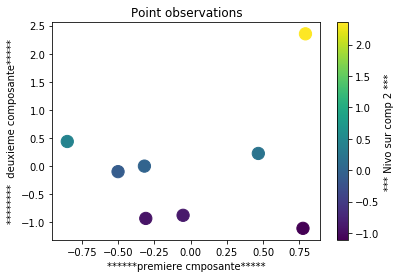

NameError: name 'area' is not defined

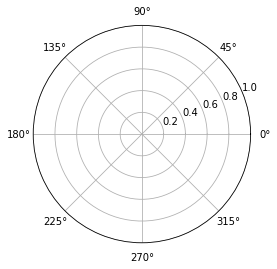

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt

#fig = plt.figure()
#ax = fig.gca(projection='3d')
marker_size = 150
plt.scatter(get_var(1,cmp),get_var(2,cmp),marker_size,c = get_var(2,cmp))
cbar = plt.colorbar()
cbar.set_label("*** Nivo sur comp 2 ***", labelpad=5)
plt.title("Courbe individus")
plt.title("Point observations")
plt.xlabel("******premiere cmposante*****")
plt.ylabel("********  deuxieme composante*****")
#ax.set_xlabel('Axe 1')
#ax.set_ylabel('Axe 2')
#ax.set_zlabel('Axe 3')
#plt.tight_layout()
#ax.view_init(45,60)
plt.show()
#a = np.arange(np.array(get_var(1,cmp)))
#b = np.arange(np.array(get_var(1,cmp)))
#c = np.arange(np.array(get_var(1,cmp)))
#A,B,C = np.meshgrid(a,b,c)
#C = h(A,B)
#ax.plot_wireframe(A,B,C,rstride=1, cstride=1)"
#ax.plot_surface(a.all(),b.all(),c.all(),rstride=1, cstride=1)
#ax.plot(get_var(1,cmp),get_var(2,cmp),get_var(3,cmp))
#plt.xlabel("parameter 1 : x")
#plt.ylabel("parameter 2 : y")



# Fixing random state for reproducibility


# Fixing random state for reproducibility
#np.random.seed(19680801)

# Compute areas and colors
N = len(cmp_principal_var[0])
r = [1]*len(cmp_principal_var[0])
theta = 2 * np.pi * np.random.rand(N)
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(cmp_principal_var[0],r, c=colors, s=area, cmap='hsv', alpha=1)

In [ ]:
# ************* EXECUTION ******************
#nom_fichier,nbLignes,nbColone = defition_donnes()
choix = str(input("Generer un fichier ?(0 == oui )\n fichier existant (N == non) ::"))
if(choix == "o" or choix=="O"):
    creer_fichier_de_données(nom_fichier,nbLignes,nbColone)
    data_f = init_data_matrix(defition_donnes())
else:
    nom_fichier,nbLignes,nbColone = defition_donnes()
    data_f = init_data_matrix(nom_fichier)
idm = ind_moyen(data_f)
tab_ect = ecart_type(data_f)
rd_data = RC_data(data_f,idm,tab_ect)
mat_cova = covMat(rd_data)
valeur_propre,vect_propre = eig_value(mat_cova)
ordre_vecteurs = ordre_vect(valeur_propre)
nombre_axe ,valeur_p,inertie,vecteur_choisi = choix_axes(valeur_propre,ordre_vecteurs,vect_propre)
composant_princ = multiply(rd_data,np.transpose(vecteur_choisi))
correlation_axe_var = corr_comp_var(composant_princ,rd_data)


# ***********************************************************************
# ***********************   REPRESENTATION ******************************
# ***********************************************************************
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(get_var(1,cmp),get_var(2,cmp),get_var(3,cmp),label='courbe')
plt.title("Courbe individus")
ax.set_xlabel('Axe 1')
ax.set_ylabel('Axe 2')
ax.set_zlabel('Axe 3')
plt.tight_layout()
ax.view_init(45,60)
plt.show()
#a = np.arange(np.array(get_var(1,cmp)))
#b = np.arange(np.array(get_var(1,cmp)))
#c = np.arange(np.array(get_var(1,cmp)))
#A,B,C = np.meshgrid(a,b,c)
#C = h(A,B)
#ax.plot_wireframe(A,B,C,rstride=1, cstride=1)"
#ax.plot_surface(a.all(),b.all(),c.all(),rstride=1, cstride=1)
#ax.plot(get_var(1,cmp),get_var(2,cmp),get_var(3,cmp))
#plt.xlabel("parameter 1 : x")
#plt.ylabel("parameter 2 : y")



# Fixing random state for reproducibility


# Fixing random state for reproducibility
#np.random.seed(19680801)

# Compute areas and colors
N = len(cmp_principal_var[0])
r = [1]*len(cmp_principal_var[0])
theta = 2 * np.pi * np.random.rand(N)
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(cmp_principal_var[0],r, c=colors, s=area, cmap='hsv', alpha=1)